In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/london_merged.csv


In [2]:
df_london = pd.read_csv("/kaggle/input/london_merged.csv")
df_london

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0
17410,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0
17411,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0


In [3]:
df_london.isna().sum()

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

In [4]:
df_london.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


In [5]:
float_32_columns = ['cnt', 't1', 't2', 'hum', 'wind_speed', 'weather_code', 'is_holiday', 'is_weekend', 'season']
df_london[float_32_columns] = df_london[float_32_columns].astype('float32').round(2)

In [6]:
df_london.describe()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
count,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000
mean,1143.101685,12.468090,11.520836,72.324951,15.913064,2.722752,0.022051,0.285403,1.492075
std,1085.108154,5.571818,6.615145,14.313186,7.894570,2.341163,0.146854,0.451619,1.118911
min,0.000000,-1.500000,-6.000000,20.500000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,257.000000,8.000000,6.000000,63.000000,10.000000,1.000000,0.000000,0.000000,0.000000
50%,844.000000,12.500000,12.500000,74.500000,15.000000,2.000000,0.000000,0.000000,1.000000
75%,1671.750000,16.000000,16.000000,83.000000,20.500000,3.000000,0.000000,1.000000,2.000000
max,7860.000000,34.000000,34.000000,100.000000,56.500000,26.000000,1.000000,1.000000,3.000000


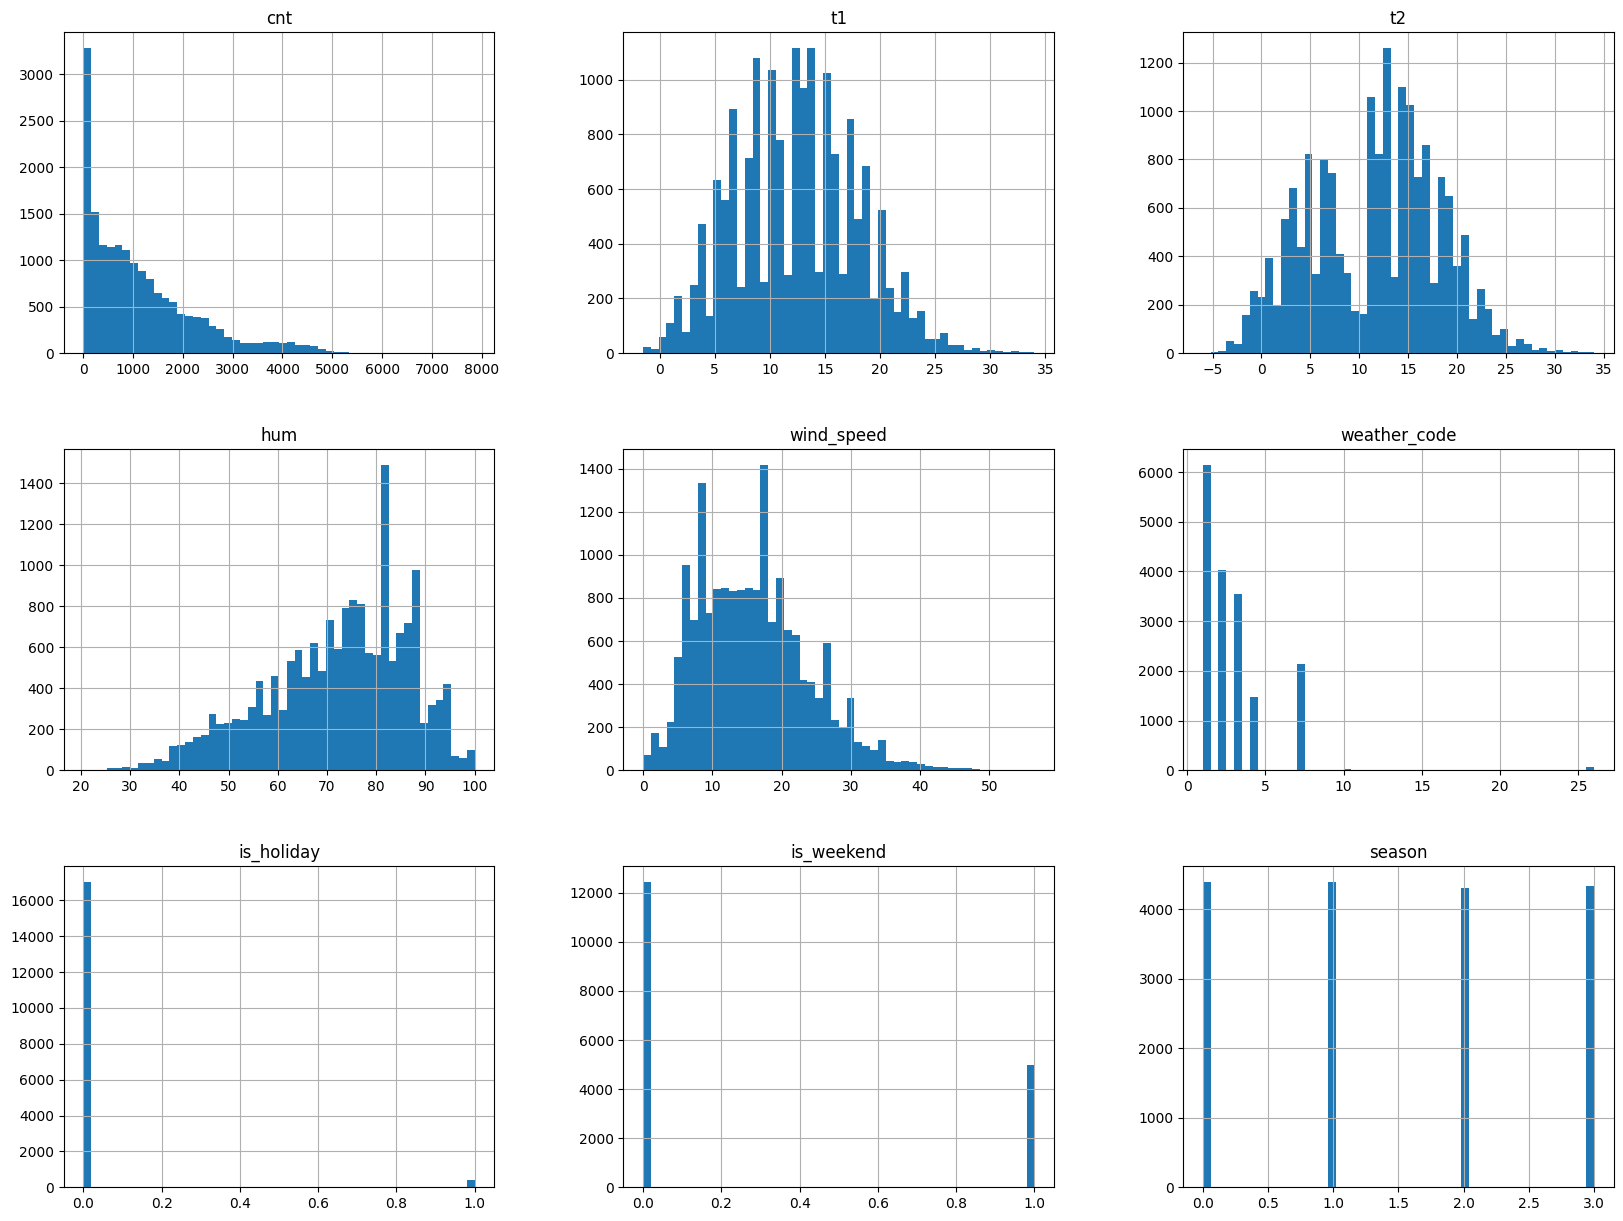

In [7]:
import matplotlib.pyplot as plt

hist = df_london.hist(bins=50, figsize=(20,15))
plt.show()

In [8]:
df_london['weather_code'].value_counts()

weather_code
1.0     6150
2.0     4034
3.0     3551
7.0     2141
4.0     1464
26.0      60
10.0      14
Name: count, dtype: int64

In [9]:
df_london['wind/hum'] = df_london['wind_speed']/df_london['hum']
df_london['year'] = pd.DatetimeIndex(df_london['timestamp']).year
df_london['month'] = pd.DatetimeIndex(df_london['timestamp']).month
df_london['day'] = pd.DatetimeIndex(df_london['timestamp']).day
df_london['hour'] = pd.DatetimeIndex(df_london['timestamp']).hour
df_london.drop('timestamp', axis=1, inplace=True)
df_london

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,wind/hum,year,month,day,hour
0,182.0,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,0.064516,2015,1,4,0
1,138.0,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,0.053763,2015,1,4,1
2,134.0,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,0.000000,2015,1,4,2
3,72.0,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,0.000000,2015,1,4,3
4,47.0,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,0.069892,2015,1,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17409,1042.0,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0,0.234568,2017,1,3,19
17410,541.0,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0,0.259259,2017,1,3,20
17411,337.0,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0,0.305732,2017,1,3,21
17412,224.0,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0,0.302632,2017,1,3,22


In [10]:
df_london.isna().sum()

cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
wind/hum        0
year            0
month           0
day             0
hour            0
dtype: int64

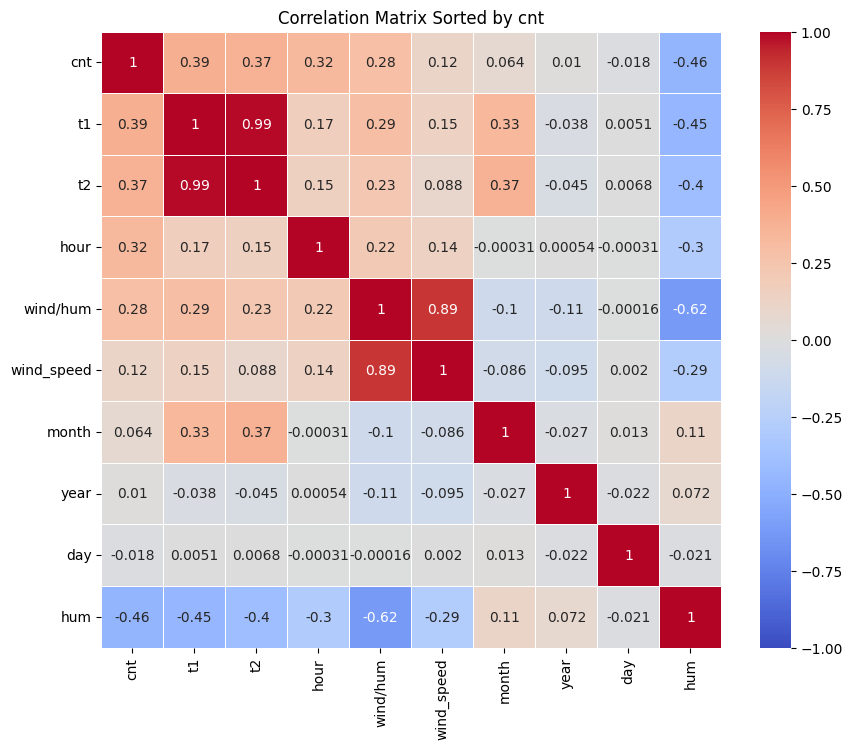

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Korelasyon matrisini oluştur ve 'cnt' sütununa göre sırala
corr_matrix = df_london[['cnt', 't1', 't2', 'hum', 'wind_speed', 'wind/hum', 'year', 'month', 'day', 'hour']].corr()
sorted_corr = corr_matrix['cnt'].sort_values(ascending=False)

# Korelasyon matrisinin sıralanmış sütunlarını seç
sorted_columns = sorted_corr.index

# Sıralanmış sütunlar için korelasyon matrisini yeniden oluştur
sorted_corr_matrix = df_london[sorted_columns].corr()

# Seaborn ile heatmap (ısı haritası) oluştur
plt.figure(figsize=(10, 8))
sns.heatmap(sorted_corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)

# Grafik başlığını ekle
plt.title('Correlation Matrix Sorted by cnt')
plt.show()

In [12]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

categ_columns = ['weather_code', 'is_holiday', 'is_weekend', 'season']


result = pd.DataFrame()

# ANOVA sonuçlarını analiz et ve bir DataFrame'e ekle
for col in categ_columns:
    model = ols(f'cnt ~ C({col})', data=df_london).fit()  # OLS modeli kur
    anova_table = sm.stats.anova_lm(model, typ=2)  # ANOVA testini yap
    
    # ANOVA tablosuna kolon ismini ekle ve sonuçları birleştir
    anova_table['Variable'] = col
    result = pd.concat([result, anova_table])

result

    
# F Değerinin Kuralı:

# Genel bir kural olarak F değerinin 1'in üzerinde olması, kategoriler arasında bir fark olabileceğini gösterir. Ancak F değeri 1'e yakınsa, bu farkın rastlantısal olması daha olasıdır.
# Daha yüksek F değerleri (>10, >50) kategorik değişkenin etkisinin daha güçlü olduğunu gösterir.

# Eğer p-değeri belirli bir anlamlılık seviyesinden (genellikle 0.05) küçükse, bu değişkenin bağımlı değişken üzerinde istatistiksel 
# olarak anlamlı bir etki yarattığını gösterir.

,sum_sq,df,F,PR(>F),Variable
C(weather_code),1.340602e+09,6.0,202.964602,4.090079e-251,weather_code
Residual,1.916250e+10,17407.0,NaN,NaN,weather_code
C(is_holiday),5.479894e+07,1.0,46.662016,8.713736e-12,is_holiday
Residual,2.044830e+10,17412.0,NaN,NaN,is_holiday
C(is_weekend),1.909265e+08,1.0,163.666007,2.634755e-37,is_weekend
Residual,2.031218e+10,17412.0,NaN,NaN,is_weekend
C(season),9.125765e+08,3.0,270.334018,1.655472e-171,season
Residual,1.959053e+10,17410.0,NaN,NaN,season


In [13]:
X = df_london.drop(columns='cnt')
y = df_london['cnt']

In [14]:
from sklearn.model_selection import StratifiedShuffleSplit

# Stratify kolonu: weather
stratify_col = df_london['weather_code']

# Stratified splitting (eğitim ve test setlerini böler)
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(X, stratify_col):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

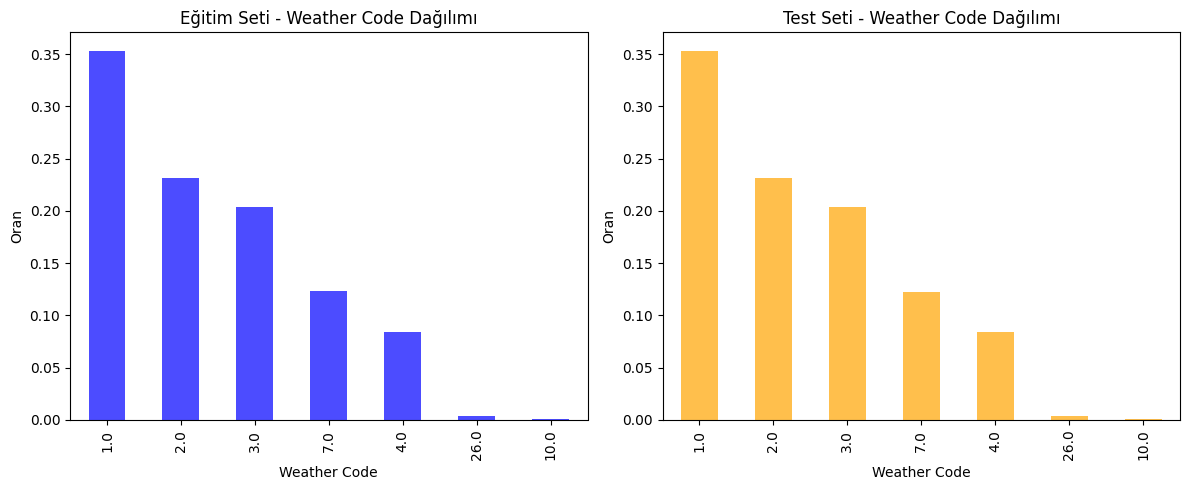

In [15]:
# Eğitim setinin histogramını oluştur
plt.figure(figsize=(12, 5))  # Figür boyutunu ayarlayın

# Eğitim seti histogramı
plt.subplot(1, 2, 1)  # 1 satır, 2 sütun, 1. grafik
X_train['weather_code'].value_counts(normalize=True).plot(kind='bar', color='blue', alpha=0.7)
plt.title('Eğitim Seti - Weather Code Dağılımı')
plt.xlabel('Weather Code')
plt.ylabel('Oran')

# Test seti histogramı
plt.subplot(1, 2, 2)  # 1 satır, 2 sütun, 2. grafik
X_test['weather_code'].value_counts(normalize=True).plot(kind='bar', color='orange', alpha=0.7)
plt.title('Test Seti - Weather Code Dağılımı')
plt.xlabel('Weather Code')
plt.ylabel('Oran')

# Grafiklerin gösterilmesi
plt.tight_layout()  # Aralıkları ayarlamak için
plt.show()

In [16]:
X_train = pd.get_dummies(X_train, columns = categ_columns, drop_first = True)
X_test = pd.get_dummies(X_test, columns = categ_columns, drop_first = True)

In [17]:
# Yeni eklenen kolonun performansa etkisi (cross vall ile)
# Straf ile bölüp kıyaslama

In [18]:
# from sklearn.model_selection import train_test_split, cross_val_score
# from sklearn.preprocessing import StandardScaler
# from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor
# from sklearn.svm import SVR
# from sklearn.neighbors import KNeighborsRegressor
# from sklearn.neural_network import MLPRegressor
# from sklearn.gaussian_process import GaussianProcessRegressor
# from sklearn.metrics import mean_squared_error
# from xgboost import XGBRegressor
# from lightgbm import LGBMRegressor


# # Özellikleri ölçeklendirme
# scaler = StandardScaler()

# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)


# # Modeller
# models = {
#     'Linear Regression': LinearRegression(),
#     'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
#     'XGBoost': XGBRegressor(n_estimators=100, random_state=42),
#     'Ridge Regression': Ridge(),
#     'Lasso Regression': Lasso(),
#     'Elastic Net': ElasticNet(),
#     'SGD Regressor': SGDRegressor(max_iter=1000, tol=1e-3),
#     'Decision Tree': DecisionTreeRegressor(random_state=42),
#     'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
#     'AdaBoost': AdaBoostRegressor(n_estimators=100, random_state=42),
#     'Extra Trees': ExtraTreesRegressor(n_estimators=100, random_state=42),
#     'SVR': SVR(),
#     'K-Nearest Neighbors': KNeighborsRegressor(),
#     'MLP Regressor': MLPRegressor(max_iter=1000, random_state=42),
#     'Gaussian Process': GaussianProcessRegressor(random_state=42),
#     'LightGBM': LGBMRegressor(n_estimators=100, random_state=42)
# }

# # Sonuçları saklayacak liste
# results = []

# # Her model için döngü
# for name, model in models.items():
#     try:
#         # Modeli eğitme
#         model.fit(X_train, y_train)
        
#         # Tahmin yapma
#         y_pred = model.predict(X_test)
        
#         # Metrikleri hesaplama
#         rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        
#         # Çapraz doğrulama
#         cv_scores = cross_val_score(model, X_train, y_train, cv=3, scoring='neg_mean_squared_error')
#         cv_rmse = np.sqrt(-cv_scores)
        
#         # Sonuçları listeye ekleme
#         results.append({
#             'Model': name,
#             'RMSE': rmse,         
#             'CV RMSE (Ort ± Std)': f"{cv_rmse.mean():.2f} ± {cv_rmse.std():.2f}"
#         })
#     except Exception as e:
#         print(f"Hata: {name} modeli için bir sorun oluştu: {str(e)}")
        
# # Sonuçları DataFrame'e dönüştürme ve RMSE'ye göre sıralama
# results_df = pd.DataFrame(results).sort_values('RMSE')

# numeric_columns = ['RMSE']
# results_df[numeric_columns] = round(results_df[numeric_columns], 2)
# results_df

In [19]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

# Modeli tanımla
model = XGBRegressor()

# Hiperparametrelerin belirlenmesi
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.5, 0.7, 1.0],
    'colsample_bytree': [0.5, 0.7, 1.0]
}

# GridSearchCV nesnesini oluştur
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, 
                           cv=3, scoring='neg_mean_squared_error', verbose=0)

# Modeli eğit
grid_search.fit(X_train, y_train)

# En iyi hiperparametreler
print("En iyi hiperparametreler: ", grid_search.best_params_)

# En iyi hiperparametreler:  {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.7}


En iyi hiperparametreler:  {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.7}


In [20]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

# Modeli tanımla
model = XGBRegressor()

# Hiperparametrelerin belirlenmesi
param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': randint(3, 10),
    'learning_rate': uniform(0.01, 0.3),
    'subsample': uniform(0.5, 1.0),
    'colsample_bytree': uniform(0.5, 1.0)
}

# RandomizedSearchCV nesnesini oluştur
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist,
                                   n_iter=100, cv=3, scoring='neg_mean_squared_error', verbose=2)

# Modeli eğit
random_search.fit(X_train, y_train)

# En iyi hiperparametreler
print("En iyi hiperparametreler: ", random_search.best_params_)

# En iyi hiperparametreler:  {'colsample_bytree': 0.8083576104279236, 'learning_rate': 0.14699372317162435, 'max_depth': 8, 'n_estimators': 180, 'subsample': 0.8665292223397957}

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END colsample_bytree=1.2926640314102067, learning_rate=0.30223637848627094, max_depth=3, n_estimators=175, subsample=0.5581981694792038; total time=   0.0s
[CV] END colsample_bytree=1.2926640314102067, learning_rate=0.30223637848627094, max_depth=3, n_estimators=175, subsample=0.5581981694792038; total time=   0.0s
[CV] END colsample_bytree=1.2926640314102067, learning_rate=0.30223637848627094, max_depth=3, n_estimators=175, subsample=0.5581981694792038; total time=   0.0s
[CV] END colsample_bytree=0.5517703881547618, learning_rate=0.10859957417376978, max_depth=5, n_estimators=58, subsample=0.9260373555254761; total time=   0.2s
[CV] END colsample_bytree=0.5517703881547618, learning_rate=0.10859957417376978, max_depth=5, n_estimators=58, subsample=0.9260373555254761; total time=   0.2s
[CV] END colsample_bytree=0.5517703881547618, learning_rate=0.10859957417376978, max_depth=5, n_estimators=58, subsample=0.92603735552

/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
225 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.10/site-packages/xgboost/core.py", line 730, in inner_f
    return func(**kwargs)
  File "/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py", line 1090, in fit
    self._Booster = train(
  File "/opt/conda/lib/python3.10/site-packages/xgboost/core.py", line 730, in inner_f
 

En iyi hiperparametreler:  {'colsample_bytree': 0.9038950949249595, 'learning_rate': 0.1229684585379983, 'max_depth': 7, 'n_estimators': 180, 'subsample': 0.9733622380819261}


In [21]:
from skopt import BayesSearchCV
from xgboost import XGBRegressor

# Modeli tanımla
model = XGBRegressor()

# Hiperparametrelerin belirlenmesi
param_space = {
    'n_estimators': (50, 200),
    'max_depth': (3, 10),
    'learning_rate': (0.01, 0.3),
    'subsample': (0.5, 1.0),
    'colsample_bytree': (0.5, 1.0)
}

# BayesSearchCV nesnesini oluştur
bayes_search = BayesSearchCV(model, param_space, n_iter=50, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)

# Modeli eğit
bayes_search.fit(X_train, y_train)

# En iyi hiperparametreler
print("En iyi hiperparametreler: ", bayes_search.best_params_)

# En iyi hiperparametreler:  OrderedDict([('colsample_bytree', 0.973166654670819), ('learning_rate', 0.10513769619499706), ('max_depth', 9), ('n_estimators', 200), ('subsample', 0.6618997804201687)])

En iyi hiperparametreler:  OrderedDict([('colsample_bytree', 1.0), ('learning_rate', 0.10165074902501886), ('max_depth', 9), ('n_estimators', 157), ('subsample', 0.8778826225822992)])


In [22]:
from sklearn.metrics import mean_squared_error
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials


# Hedef fonksiyonu tanımlama
def objective(params):
    # XGBoost modelini tanımlama
    model = XGBRegressor(
        n_estimators=100,
        max_depth=int(params['max_depth']),
        learning_rate=params['learning_rate'],
        gamma=params['gamma'],
        subsample=params['subsample'],
        colsample_bytree=params['colsample_bytree'],
        random_state=42
    )
    
    # Modeli eğitme
    model.fit(X_train, y_train)
    
    # Tahmin yapma
    y_pred = model.predict(X_test)
    
    # Hata hesaplama
    mse = mean_squared_error(y_test, y_pred)
    
    return {'loss': mse, 'status': STATUS_OK}

# Hiperparametre arama alanını tanımlama
space = {
    'max_depth': hp.randint('max_depth', 3, 15),  # 3 ile 15 arasında değer
    'learning_rate': hp.uniform('learning_rate', 0.01, 0.3),  # 0.01 ile 0.3 arasında değer
    'gamma': hp.uniform('gamma', 0, 5),  # 0 ile 5 arasında değer
    'subsample': hp.uniform('subsample', 0.5, 1),  # 0.5 ile 1 arasında değer
    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 1)  # 0.5 ile 1 arasında değer
}

# Hyperopt ile optimizasyon yapma
trials = Trials()
best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=50,  # Toplam deneme sayısı
            trials=trials)

print("En iyi hiperparametreler:", best)
# En iyi hiperparametreler: {'colsample_bytree': 0.9958171224898592, 'gamma': 2.3268900129383057, 'learning_rate': 0.1083522755761465, 'max_depth': 9, 'subsample': 0.7019542356839976}

100%|██████████| 50/50 [00:38<00:00,  1.29trial/s, best loss: 41561.6875]
En iyi hiperparametreler: {'colsample_bytree': 0.9786584568067037, 'gamma': 3.450784203597497, 'learning_rate': 0.21640793807338599, 'max_depth': 10, 'subsample': 0.6281922176594774}


In [23]:
model_grid_search = XGBRegressor(colsample_bytree = 1.0, learning_rate = 0.1, max_depth = 7, n_estimators = 200, subsample = 0.7)
model_grid_search.fit(X_train, y_train)
y_pred = model_grid_search.predict(X_test)
rmse_grid_search = np.sqrt(mean_squared_error(y_test, y_pred))


model_random_search = XGBRegressor(colsample_bytree = 0.8083576104279236, learning_rate = 0.14699372317162435, max_depth = 8, n_estimators = 180, subsample = 0.8665292223397957)
model_random_search.fit(X_train, y_train)
y_pred = model_random_search.predict(X_test)
rmse_random_search = np.sqrt(mean_squared_error(y_test, y_pred))

model_bayes = XGBRegressor(colsample_bytree = 0.973166654670819, learning_rate =0.10513769619499706, max_depth = 9, n_estimators = 200, subsample = 0.6618997804201687)
model_bayes.fit(X_train, y_train)
y_pred = model_bayes.predict(X_test)
rmse_bayes = np.sqrt(mean_squared_error(y_test, y_pred))

model_hyper = XGBRegressor(colsample_bytree = 0.9958171224898592,  gamma = 2.3268900129383057, learning_rate =0.1083522755761465, max_depth = 9, subsample = 0.7019542356839976)
model_hyper.fit(X_train, y_train)
y_pred = model_hyper.predict(X_test)
rmse_hyper = np.sqrt(mean_squared_error(y_test, y_pred))


results_df = pd.DataFrame({
    "Optimization Method": ["Grid Search", "Random Search", "Bayes Search", "Hyperopt"],
    "RMSE": [rmse_grid_search, rmse_random_search, rmse_bayes, rmse_hyper]
})

In [24]:
results_df

,Optimization Method,RMSE
0,Grid Search,206.054596
1,Random Search,200.233994
2,Bayes Search,197.780609
3,Hyperopt,202.491043


In [25]:
# !pip install optuna
# import optuna
# import warnings

# # FutureWarning uyarılarını kapat
# warnings.filterwarnings("ignore", category=FutureWarning)

# # Get the best model from results_df
# best_model_name = results_df.iloc[0]['Model']

# def get_param_space(trial, model_name):
#     if model_name == 'XGBoost':
#         return {
#             'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
#             'max_depth': trial.suggest_int('max_depth', 1, 30),
#             'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1.0),
#             'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
#             'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),
#         }
#     elif model_name in ['Random Forest', 'Extra Trees']:
#         return {
#             'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
#             'max_depth': trial.suggest_int('max_depth', 1, 30),
#             'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
#             'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 20),
#         }
#     elif model_name == 'Gradient Boosting':
#         return {
#             'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
#             'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1.0),
#             'max_depth': trial.suggest_int('max_depth', 1, 30),
#             'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
#             'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 20),
#         }
#     elif model_name in ['Ridge Regression', 'Lasso Regression', 'Elastic Net']:
#         return {
#             'alpha': trial.suggest_loguniform('alpha', 1e-5, 1e5),
#         }
#     elif model_name == 'SVR':
#         return {
#             'C': trial.suggest_loguniform('C', 1e-5, 1e5),
#             'epsilon': trial.suggest_loguniform('epsilon', 1e-5, 1e2),
#             'kernel': trial.suggest_categorical('kernel', ['linear', 'rbf', 'poly', 'sigmoid']),
#         }
#     elif model_name == 'K-Nearest Neighbors':
#         return {
#             'n_neighbors': trial.suggest_int('n_neighbors', 1, min(50, X_train.shape[0])),
#             'weights': trial.suggest_categorical('weights', ['uniform', 'distance']),
#         }
#     elif model_name == 'MLP Regressor':
#         return {
#             'hidden_layer_sizes': trial.suggest_categorical('hidden_layer_sizes', [(50,), (100,), (50, 50), (100, 50)]),
#             'alpha': trial.suggest_loguniform('alpha', 1e-5, 1e2),
#             'learning_rate_init': trial.suggest_loguniform('learning_rate_init', 1e-5, 1e-1),
#         }
#     elif model_name == 'Linear Regression':
#         return {
#             'fit_intercept': trial.suggest_categorical('fit_intercept', [True, False]),
#             'normalize': trial.suggest_categorical('normalize', [True, False]),
#         }
#     elif model_name == 'Gaussian Process':
#         return {
#             'alpha': trial.suggest_loguniform('alpha', 1e-10, 1e1),
#             'n_restarts_optimizer': trial.suggest_int('n_restarts_optimizer', 0, 10),
#             'kernel': trial.suggest_categorical('kernel', ['RBF', 'Matern', 'RationalQuadratic', 'ExpSineSquared']),
#         }
#     else:
#         return {}

# def get_model(model_name, params):
#     if model_name == 'XGBoost':
#         return XGBRegressor(**params, random_state=42)
#     elif model_name == 'Random Forest':
#         return RandomForestRegressor(**params, random_state=42)
#     elif model_name == 'Extra Trees':
#         return ExtraTreesRegressor(**params, random_state=42)
#     elif model_name == 'Gradient Boosting':
#         return GradientBoostingRegressor(**params, random_state=42)
#     elif model_name == 'Ridge Regression':
#         return Ridge(**params, random_state=42)
#     elif model_name == 'Lasso Regression':
#         return Lasso(**params, random_state=42)
#     elif model_name == 'Elastic Net':
#         return ElasticNet(**params, random_state=42)
#     elif model_name == 'SVR':
#         return SVR(**params)
#     elif model_name == 'K-Nearest Neighbors':
#         return KNeighborsRegressor(**params)
#     elif model_name == 'MLP Regressor':
#         return MLPRegressor(**params, random_state=42, max_iter=1000)
#     elif model_name == 'Linear Regression':
#         return LinearRegression()
#     elif model_name == 'Decision Tree':
#         return DecisionTreeRegressor(random_state=42)
#     elif model_name == 'AdaBoost':
#         return AdaBoostRegressor(random_state=42)
#     elif model_name == 'Gaussian Process':
#         return GaussianProcessRegressor(random_state=42)
#     else:
#         raise ValueError(f"Unsupported model: {model_name}")

# # Define the objective function for Optuna
# def objective(trial):
#     params = get_param_space(trial, best_model_name)
#     model = get_model(best_model_name, params)
#     model.fit(X_train, y_train)
#     y_pred = model.predict(X_test)
#     rmse = np.sqrt(mean_squared_error(y_test, y_pred))
#     return rmse

# optuna.logging.set_verbosity(optuna.logging.WARNING)

# # Optimize hyperparameters
# study = optuna.create_study(direction='minimize')
# study.optimize(objective, n_trials=100)

# best_params = study.best_params
# print("Best parameters:", best_params, f"Best model: {best_model_name}")

# Best parameters: {'n_estimators': 633, 'max_depth': 10, 'learning_rate': 0.03963004548416581, 'subsample': 0.5072137170842459, 'colsample_bytree': 0.8714773501422581} Best model: XGBoost

In [26]:
# # En iyi parametrelerle modeli oluştur ve eğit
# best_model = get_model(best_model_name, best_params)

# # Modeli eğit
# best_model.fit(X_train, y_train)

# # Test veri seti üzerinde tahmin yap
# y_pred = best_model.predict(X_test)

# # Performans metriğini hesapla (örneğin RMSE)
# best_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# print(f"Best model: {best_model_name}")
# print(f"Test RMSE: {best_rmse}")

In [27]:
# import numpy as np
# from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
# from sklearn.metrics import mean_squared_error, make_scorer
# from skopt import BayesSearchCV
# import optuna
# import warnings
# import pandas as pd
# import time
# from typing import Dict, Any, Callable
# import matplotlib.pyplot as plt
# import seaborn as sns

# warnings.filterwarnings("ignore", category=FutureWarning)
# warnings.filterwarnings("ignore", category=UserWarning)

# class HyperparameterOptimizer:
#     def __init__(self, X_train, X_test, y_train, y_test, model_class, param_grid):
#         self.X_train = X_train
#         self.X_test = X_test
#         self.y_train = y_train
#         self.y_test = y_test
#         self.model_class = model_class
#         self.param_grid = param_grid
#         self.results = {}
        
#     def _get_optuna_objective(self):
#         def objective(trial):
#             params = {}
#             for param, space in self.param_grid.items():
#                 if isinstance(space, list):
#                     if isinstance(space[0], int):
#                         params[param] = trial.suggest_int(param, space[0], space[-1])
#                     elif isinstance(space[0], float):
#                         params[param] = trial.suggest_float(param, space[0], space[-1], log=True)
#                     elif isinstance(space[0], str):
#                         params[param] = trial.suggest_categorical(param, space)
            
#             model = self.model_class(**params)
#             model.fit(self.X_train, self.y_train)
#             y_pred = model.predict(self.X_test)
#             return mean_squared_error(self.y_test, y_pred, squared=False)
#         return objective

#     def run_grid_search(self):
#         start_time = time.time()
#         grid_search = GridSearchCV(
#             self.model_class(), self.param_grid, 
#             scoring=make_scorer(mean_squared_error, squared=False, greater_is_better=False),
#             cv=5, n_jobs=-1
#         )
#         grid_search.fit(self.X_train, self.y_train)
#         duration = time.time() - start_time
        
#         best_model = self.model_class(**grid_search.best_params_)
#         best_model.fit(self.X_train, self.y_train)
#         y_pred = best_model.predict(self.X_test)
#         rmse = mean_squared_error(self.y_test, y_pred, squared=False)
        
#         self.results['GridSearchCV'] = {
#             'best_params': grid_search.best_params_,
#             'rmse': rmse,
#             'time': duration,
#             'n_iterations': len(grid_search.cv_results_['params'])
#         }

#     def run_random_search(self, n_iter=100):
#         start_time = time.time()
#         random_search = RandomizedSearchCV(
#             self.model_class(), self.param_grid, 
#             n_iter=n_iter,
#             scoring=make_scorer(mean_squared_error, squared=False, greater_is_better=False),
#             cv=5, n_jobs=-1
#         )
#         random_search.fit(self.X_train, self.y_train)
#         duration = time.time() - start_time
        
#         best_model = self.model_class(**random_search.best_params_)
#         best_model.fit(self.X_train, self.y_train)
#         y_pred = best_model.predict(self.X_test)
#         rmse = mean_squared_error(self.y_test, y_pred, squared=False)
        
#         self.results['RandomizedSearchCV'] = {
#             'best_params': random_search.best_params_,
#             'rmse': rmse,
#             'time': duration,
#             'n_iterations': n_iter
#         }

#     def run_bayesian_optimization(self, n_iter=100):
#         start_time = time.time()
#         bayes_search = BayesSearchCV(
#             self.model_class(), self.param_grid, 
#             n_iter=n_iter,
#             scoring=make_scorer(mean_squared_error, squared=False, greater_is_better=False),
#             cv=5, n_jobs=-1
#         )
#         bayes_search.fit(self.X_train, self.y_train)
#         duration = time.time() - start_time
        
#         best_model = self.model_class(**bayes_search.best_params_)
#         best_model.fit(self.X_train, self.y_train)
#         y_pred = best_model.predict(self.X_test)
#         rmse = mean_squared_error(self.y_test, y_pred, squared=False)
        
#         self.results['BayesianOptimization'] = {
#             'best_params': bayes_search.best_params_,
#             'rmse': rmse,
#             'time': duration,
#             'n_iterations': n_iter
#         }

#     def run_optuna(self, n_trials=100):
#         start_time = time.time()
#         study = optuna.create_study(direction='minimize')
#         study.optimize(self._get_optuna_objective(), n_trials=n_trials)
#         duration = time.time() - start_time
        
#         best_model = self.model_class(**study.best_params)
#         best_model.fit(self.X_train, self.y_train)
#         y_pred = best_model.predict(self.X_test)
#         rmse = mean_squared_error(self.y_test, y_pred, squared=False)
        
#         self.results['Optuna'] = {
#             'best_params': study.best_params,
#             'rmse': rmse,
#             'time': duration,
#             'n_iterations': n_trials
#         }

#     def run_all(self, n_iter=100):
#         print("Running Grid Search...")
#         self.run_grid_search()
        
#         print("Running Random Search...")
#         self.run_random_search(n_iter)
        
#         print("Running Bayesian Optimization...")
#         self.run_bayesian_optimization(n_iter)
        
#         print("Running Optuna...")
#         self.run_optuna(n_iter)

#     def plot_results(self):
#         results_df = pd.DataFrame({
#             'Method': list(self.results.keys()),
#             'RMSE': [result['rmse'] for result in self.results.values()],
#             'Time (s)': [result['time'] for result in self.results.values()]
#         })
        
#         fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
        
#         sns.barplot(x='Method', y='RMSE', data=results_df, ax=ax1)
#         ax1.set_title('RMSE Comparison')
#         ax1.tick_params(axis='x', rotation=45)
        
#         sns.barplot(x='Method', y='Time (s)', data=results_df, ax=ax2)
#         ax2.set_title('Execution Time Comparison')
#         ax2.tick_params(axis='x', rotation=45)
        
#         plt.tight_layout()
#         return fig

#     def get_summary(self):
#         summary = pd.DataFrame(columns=['Method', 'RMSE', 'Time (s)', 'Best Parameters'])
#         for method, result in self.results.items():
#             summary = summary.append({
#                 'Method': method,
#                 'RMSE': result['rmse'],
#                 'Time (s)': result['time'],
#                 'Best Parameters': result['best_params']
#             }, ignore_index=True)
#         return summary.sort_values('RMSE')

# # Kullanım örneği
# def optimize_hyperparameters(X_train, X_test, y_train, y_test, model_class, param_grid, n_iter=100):
#     optimizer = HyperparameterOptimizer(X_train, X_test, y_train, y_test, model_class, param_grid)
#     optimizer.run_all(n_iter=n_iter)
    
#     summary = optimizer.get_summary()
#     print("\nOptimization Results Summary:")
#     print(summary[['Method', 'RMSE', 'Time (s)']])
    
#     print("\nBest Parameters for Each Method:")
#     for method, result in optimizer.results.items():
#         print(f"\n{method}:")
#         for param, value in result['best_params'].items():
#             print(f"  {param}: {value}")
    
#     fig = optimizer.plot_results()
#     return optimizer, fig

# # Örnek kullanım
# if __name__ == "__main__":
#     from sklearn.datasets import make_regression
#     from sklearn.ensemble import RandomForestRegressor
    
#     # Örnek veri seti oluştur
#     X, y = make_regression(n_samples=1000, n_features=20, random_state=42)
#     X_train, X_test = X[:800], X[800:]
#     y_train, y_test = y[:800], y[800:]
    
#     # Parametre grid'ini tanımla
#     param_grid = {
#         'n_estimators': [100, 200, 300, 400, 500],
#         'max_depth': [5, 10, 15, 20, 25],
#         'min_samples_split': [2, 5, 10],
#         'min_samples_leaf': [1, 2, 4]
#     }
    
#     # Optimizasyonu çalıştır
#     optimizer, fig = optimize_hyperparameters(
#         X_train, X_test, y_train, y_test,
#         RandomForestRegressor, param_grid, n_iter=50
#     )
    
#     plt.show()

### 